<a href="https://colab.research.google.com/github/Abdalmughith/machine-learning-projects/blob/master/currency_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**currency recognition**

1.   collect data set about 125 images for every  class 100,200,500,1000,2000
2.   data augmentation

1.   build a model
2.   train a model 

1.   predict to get the result from this model


1.   export this model to use it from android








In [0]:
!pip install  numpy scipy matplotlib pillow scikit-image pandas lxml num2words 

In [0]:
!wget https://transfer.sh/1VKnd/abd.zip

In [0]:
!wget https://transfer.sh/1VKnd/abd.zip

In [0]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [0]:
!apt-get -qq install libprotobuf-java protobuf-compiler -y

In [0]:
!git clone https://github.com/wagonhelm/TF_ObjectDetection_API.git

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir  drive
!google-drive-ocamlfuse drive

In [0]:
!mkdir TF_ObjectDetection_API

In [0]:
!cp -r /content/drive/object_detection_graph .

In [0]:
!cp -r data/* /content/drive/poundLast

In [0]:
ls model

In [0]:
!cp -r /content/drive/pound/* .

In [0]:
ls data

In [0]:
!unzip images.zip -d images

In [0]:
!git clone https://github.com/wagonhelm/TF_ObjectDetection_API.git

In [0]:
cd TF_ObjectDetection_API

In [0]:

import skimage
import numpy as np
from skimage import io, transform
import os
import shutil
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import tensorflow as tf
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
import urllib.request
import urllib.error
import cv2
import tensorflow as tf
%matplotlib inline


In [0]:
cd TF_ObjectDetection_API/


In [0]:
!git clone https://github.com/tensorflow/models.git


In [0]:
cd models/research/


In [0]:
!protoc object_detection/protos/*.proto --python_out=.

In [0]:
cd ../..

In [0]:
!mkdir /content/drive/poundLastt


In [0]:
!cp -r data/* /content/drive/poundLastt


In [0]:
import os
root = os.getcwd()
imagePath = os.path.join(root, 'images')
labelsPath = os.path.join(root, 'labels')
linksPath = os.path.join(imagePath, 'imageLinks')
trainPath = os.path.join(imagePath, 'train')
testPath = os.path.join(imagePath, 'test')

In [0]:
# A simple link checker that will make sure link to image is valid
def check(url):
    try:
        f= urllib.request.urlopen(url)
    except urllib.error.URLError :
            return False
    return True

In [0]:
'''
This function will download and resize all images in the
imageLinks folder and will split into train and test folders
with their associated label.

It is your responsibility to ensure that use of copyrighted images
accessed in connection with this script complies with any license
restrictions that may apply.
'''


copyLabels = True
trainPercent = 0.85

listing = os.listdir(linksPath) 
for classes in listing:
    os.chdir(linksPath)
    text = open(classes, 'r')
    links = text.readlines()
    links = [i.strip() for i in links]
    
    cut = int(np.floor(len(links)*trainPercent))
    
    for i in range(cut):
        os.chdir(trainPath)
        if check(links[i]):
            image = skimage.io.imread(links[i])
            image = skimage.transform.resize(image, [300,300])
            skimage.io.imsave(classes[:-4]+str(i)+'.jpg', image)
            if copyLabels:
                label = classes[:-4]+str(i)+'.xml'
                shutil.copyfile(labelsPath+'/'+label,trainPath+'/'+label) 
        
    for i in range(cut,len(links)):
        os.chdir(testPath)
        if check(links[i]):
            image = skimage.io.imread(links[i])
            image = skimage.transform.resize(image, [300,300])
            skimage.io.imsave(classes[:-4]+str(i)+'.jpg', image)
            if copyLabels:
                label = classes[:-4]+str(i)+'.xml'
                shutil.copyfile(labelsPath+'/'+label,testPath+'/'+label) 
        

In [0]:
from PIL import Image

In [0]:
# Modified From:
# https://github.comr/datitran/raccoon_dataset/blob/master/xml_to_csv.py

os.chdir(root)

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    
    for i in [trainPath, testPath]:
        image_path = i
        folder = os.path.basename(os.path.normpath(i))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('data/'+folder+'.csv', index=None)
        print('Successfully converted xml to csv.')
    
main()

In [0]:
import sys
print(sys.path)

In [0]:
sys.path.append('/content/TF_ObjectDetection_API/models/research')
sys.path.append('/content/TF_ObjectDetection_API/models/research/slim')


In [0]:
!cp -r data/* /content/drive/poundLast

In [0]:
ls

In [0]:


##!python generate_tfrecord.py
exec(open("generate_tfrecord.py").read())

In [0]:
%run generate_tfrecord.py

In [0]:
!cp -r  abd /content/TF_ObjectDetection_API/abd

In [0]:
rm -rf data/ labels/ images/

In [0]:
!cp -r /drive/aa/abd /content/TF_ObjectDetection_API/abd

In [0]:
!cp TF_ObjectDetection_API/data/ssd_mobilenet_v1_pets.config data/

In [0]:
!python generate_tfrecord.py

In [0]:
!mv test.record data
!mv train.record data

In [0]:
cp data.zip images.zip /content/drive

In [0]:
!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_11_06_2017.tar.gz
!tar xvzf ssd_mobilenet_v1_coco_11_06_2017.tar.gz

In [0]:
del sys.argv

In [0]:
import sys
#sys.argv = ['--pipeline_config_path=data/ssd_mobilenet_v1_pets.config','--logtostderr','--train_dir=data/']
sys.argv = ['--logtostderr','--train_dir=data','--pipeline_config_path=data/ssd_mobilenet_v1_pets.config']
exec(open('models/research/object_detection/train.py').read())

In [0]:
!cat data/checkpoint

In [0]:
import re
import num2words


with open('data/checkpoint') as f_input:
    text = f_input.read()

text = re.sub(r"datamodel", "data/model", text)

with open('data/checkpoint', 'w') as f_output:
    f_output.write(text)

In [0]:
% run  models/research/object_detection/train.py --logtostderr --train_dir=data/ --pipeline_config_path=data/ssd_mobilenet_v1_pets.config > aa 2>&1 &

In [0]:
cp -r data/* /content/drive/plate

In [0]:
cp  /content/drive/pound

In [0]:
cp images.zip /content/drive/pound

In [0]:
import re
import num2words


with open('data/ssd_mobilenet_v1_pets.config') as f_input:
    text = f_input.read()

text = re.sub(r"15000", "25000", text)

with open('data/ssd_mobilenet_v1_pets.config', 'w') as f_output:
    f_output.write(text)

In [0]:
!cat data/ssd_mobilenet_v1_pets.config

In [0]:
ls data/

In [0]:
!cp -r drive/aa TF_ObjectDetection_API/

In [0]:
!mkdir -p drive

In [0]:
!google-drive-ocamlfuse drive

In [0]:
!kill -9 -1

In [0]:
ls data/

In [0]:
!cp -r object_detection_graph /content/drive

In [0]:
!rm -rf /content/drive/object_detection_graph

In [0]:
LOG_DIR = '.'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip > /dev/null 2>&1
! unzip ngrok-stable-linux-amd64.zip > /dev/null 2>&1

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [0]:
# Install
! npm install -g localtunnel

In [0]:
# Tunnel port 6006 (TensorBoard assumed running)
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')

In [0]:
# Get url
! cat url.txt

In [0]:
ls

images/  models/  utils/


In [0]:
!cp -r /content/drive/poundLastt .

In [0]:
cd ..

/content/TF_ObjectDetection_API


In [0]:
!cp -R models/research/object_detection/utils/. utils

In [0]:
% run  models/research/object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --pipeline_config_path data/ssd_mobilenet_v1_pets.config \
    --trained_checkpoint_prefix data/model.ckpt-24021 \
    --output_directory object_detection_graph

In [0]:
# Modified From API
# https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

from utils import label_map_util
from utils import visualization_utils as vis_util


# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = 'object_detection_graph/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'data/label_map.pbtxt'

NUM_CLASSES = 4

PATH_TO_TEST_IMAGES_DIR = 'images/validation'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1,4) ]
IMAGE_SIZE = (12, 12)

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)




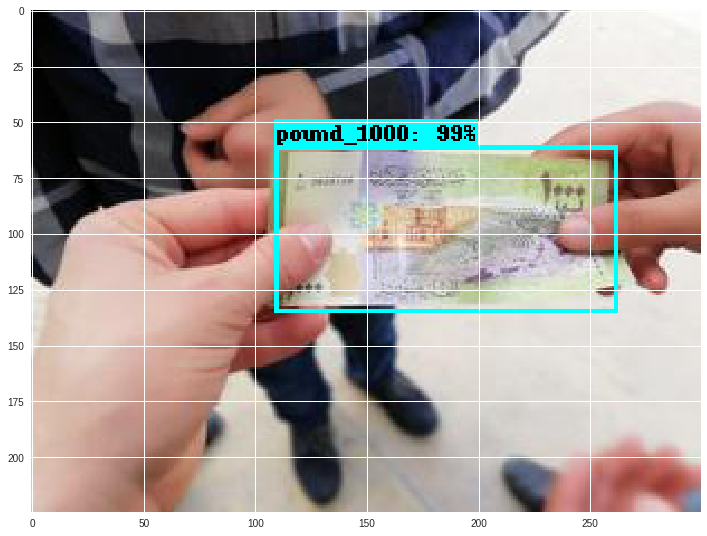

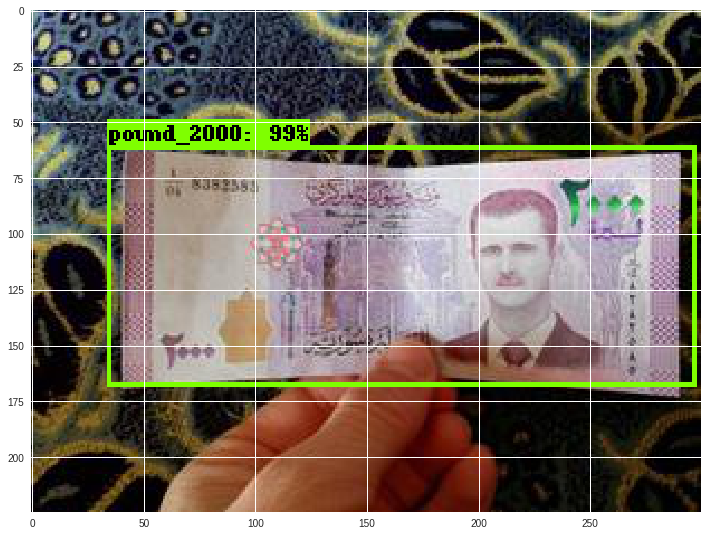

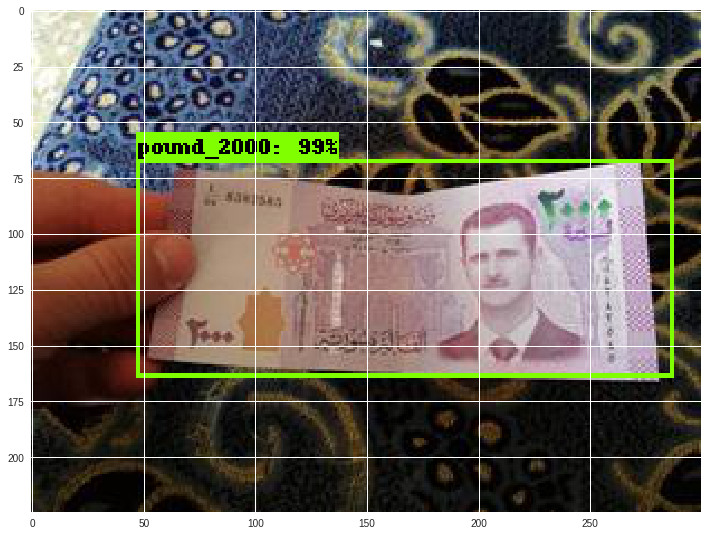

In [0]:
# Modified From API
# https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      
    
    
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=2)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)



# New Section

# New Section